In [1]:
import pykx as kx
import matplotlib.pyplot as plt

C:\Users\alvar\miniconda3\envs\PykxMiAmigo\Lib\site-packages\pykx\config.py:220: UserWarning: PYKX_THREADING is only supported on Linux / MacOS, it has been disabled.
  warn('PYKX_THREADING is only supported on Linux / MacOS, it has been disabled.')
<frozen importlib._bootstrap>:241: PyKXWarning: Unable to connect user QHOME to PyKX QHOME via symlinks
[WinError 1314] El cliente no dispone de un privilegio requerido: 'C:\\q\\desktop.ini' -> 'C:\\Users\\alvar\\miniconda3\\envs\\PykxMiAmigo\\Lib\\site-packages\\pykx\\lib\\desktop.ini'


In [3]:
%%q
// Extracting data
EWAt: flip `date`high`low`close`open`volume!("DFFFFJ";",") 0: `:EWA2.csv
EWCt: flip `date`high`low`close`open`volume!("DFFFFJ";",") 0: `:EWC2.csv

// Getting prices 
priceX: exec log close from EWCt
priceY: exec log close from EWAt


In [60]:
def plPrices (x,y,z,h,l):
    plt.figure(figsize =(15,7))
    plt.plot(label='Precios')
    plt.plot(x,y,'b',label='EWCt')
    plt.plot(x,z,'r',label='EWAt')
    if h.any():
        plt.plot(x,h,'--g',label='up')
    if l.any():
        plt.plot(x,l,'--g',label='low')
    plt.legend()
    plt.ylabel('Precios')
    plt.figure(figsize =(15,7))
    


{[f;x].pykx.util.pykx[f;x]}[foreign]enlist


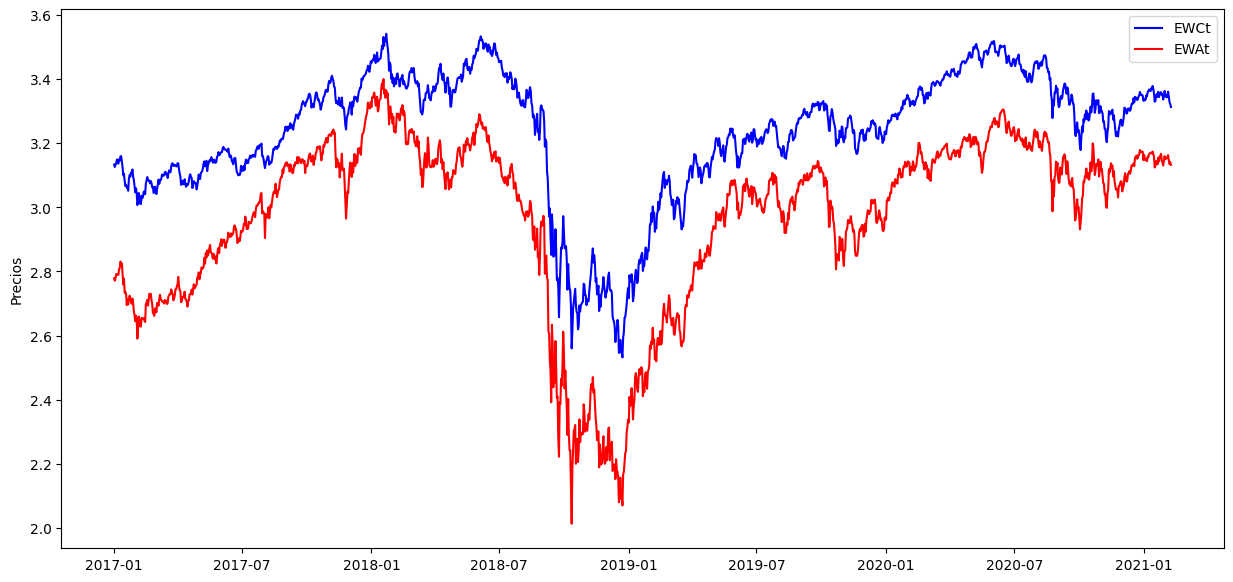

<Figure size 1500x700 with 0 Axes>

In [42]:
%%q
.pykx.get[`plPrices][timestamp: 2017.01.01 + til 1500;priceX;priceY;();()]

In [21]:
%%q
lsfit:{(enlist y) lsq x xexp/: til 1+z}
fitted: raze lsfit[priceY;priceX;1]
yPred: priceX*/1#fitted+/-1#fitted

// Constructing spreads
spreads: priceY - (priceX*/1#fitted-/-1#fitted)

mean: avg spreads
up: mean + 1.96*dev spreads
low: mean - 1.96*dev spreads
`mean`up`low!(mean;up;low)

mean| 1.788495
up  | 2.180308
low | 1.396682


{[f;x].pykx.util.pykx[f;x]}[foreign]enlist


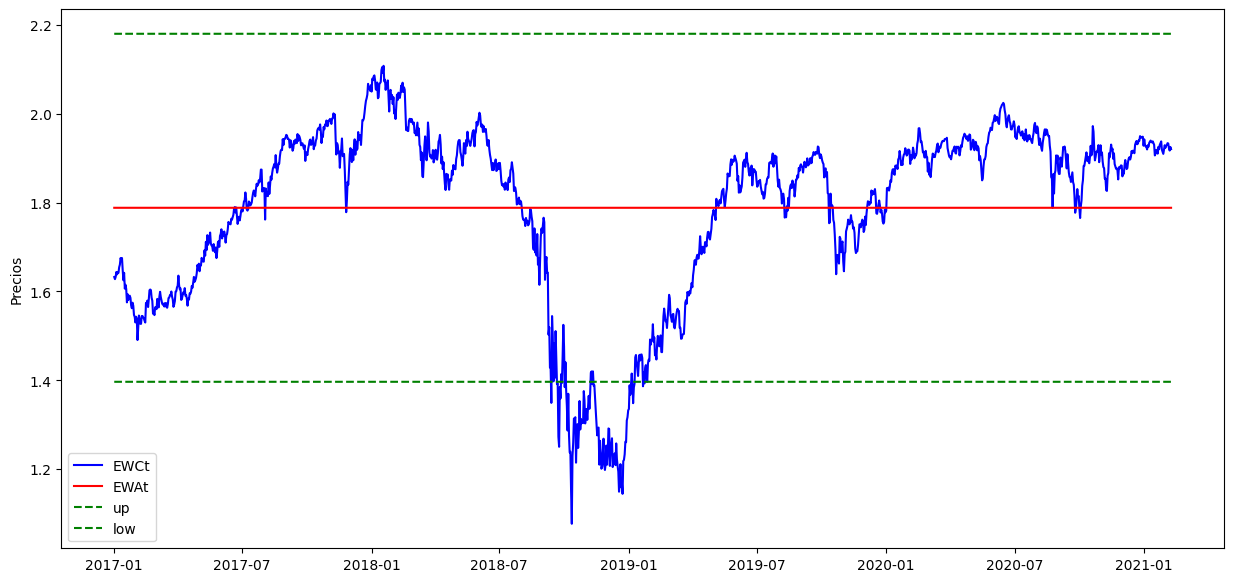

<Figure size 1500x700 with 0 Axes>

In [64]:
%%q
.pykx.get[`plPrices][timestamp: 2017.01.01 + til 1500;spreads;1500#mean;1500#up;1500#low]
